<a href="https://colab.research.google.com/github/deepsmathur25/ML_Insurance_Fraud/blob/main/INSURANCE_FRAUD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from numpy import mean
from numpy import cov
from numpy.linalg import eig
from numpy import loadtxt
# matplotlib inline
%matplotlib inline
import lightgbm as lgb
import plotly.express as px
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
sns.set()
from imblearn.ensemble import BalancedRandomForestClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 
%pylab inline
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, model_selection
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from random import random
from math import exp
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score,roc_curve

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part o

Populating the interactive namespace from numpy and matplotlib


In [ ]:
data = pd.read_csv("/content/insurance_claims.csv")
data_v=data
data.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
data.describe

<bound method NDFrame.describe of      months_as_customer  age  policy_number  ... auto_year fraud_reported _c39
0                   328   48         521585  ...      2004              Y  NaN
1                   228   42         342868  ...      2007              Y  NaN
2                   134   29         687698  ...      2007              N  NaN
3                   256   41         227811  ...      2014              Y  NaN
4                   228   44         367455  ...      2009              N  NaN
..                  ...  ...            ...  ...       ...            ...  ...
995                   3   38         941851  ...      2006              N  NaN
996                 285   41         186934  ...      2015              N  NaN
997                 130   34         918516  ...      1996              N  NaN
998                 458   62         533940  ...      1998              N  NaN
999                 456   60         556080  ...      2007              N  NaN

[1000 rows x 40 c

In [ ]:
print(data)

     months_as_customer  age  policy_number  ... auto_year fraud_reported _c39
0                   328   48         521585  ...      2004              Y  NaN
1                   228   42         342868  ...      2007              Y  NaN
2                   134   29         687698  ...      2007              N  NaN
3                   256   41         227811  ...      2014              Y  NaN
4                   228   44         367455  ...      2009              N  NaN
..                  ...  ...            ...  ...       ...            ...  ...
995                   3   38         941851  ...      2006              N  NaN
996                 285   41         186934  ...      2015              N  NaN
997                 130   34         918516  ...      1996              N  NaN
998                 458   62         533940  ...      1998              N  NaN
999                 456   60         556080  ...      2007              N  NaN

[1000 rows x 40 columns]


**Data Cleaning**











In [ ]:
data.drop('_c39',axis=1,inplace=True) #dropping the null column at present in the dataset

We are trying to detect the missing values above, for data cleaning


In [ ]:
data.isna()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [ ]:
#Checking missing values
 
def missing_values_table(df):
        
        mis_val = df.isnull().sum()
        
       
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
      
        mis_val_table = pd.concat([mis_val, mis_val_percent],axis=1)
        
       
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
       
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        return mis_val_table_ren_columns

        # Missing values statistics
missing_values = missing_values_table(data)
missing_values

Your selected dataframe has 39 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
for i in data.columns:
  if data[i].dtype=='object':
    print(i,":",data[i].nunique())

  

policy_bind_date : 951
policy_state : 3
policy_csl : 3
insured_sex : 2
insured_education_level : 7
insured_occupation : 14
insured_hobbies : 20
insured_relationship : 6
incident_date : 60
incident_type : 4
collision_type : 4
incident_severity : 4
authorities_contacted : 5
incident_state : 7
incident_city : 7
incident_location : 1000
property_damage : 3
police_report_available : 3
auto_make : 14
auto_model : 39
fraud_reported : 2


**DATA VISUALISATION**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



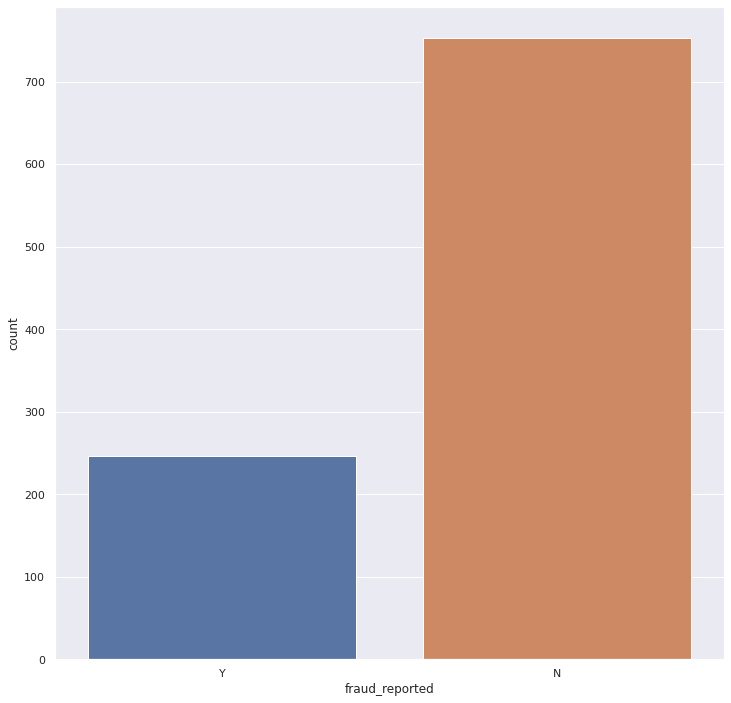

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(data['fraud_reported'])
# looking at the distribution of the dependent variable

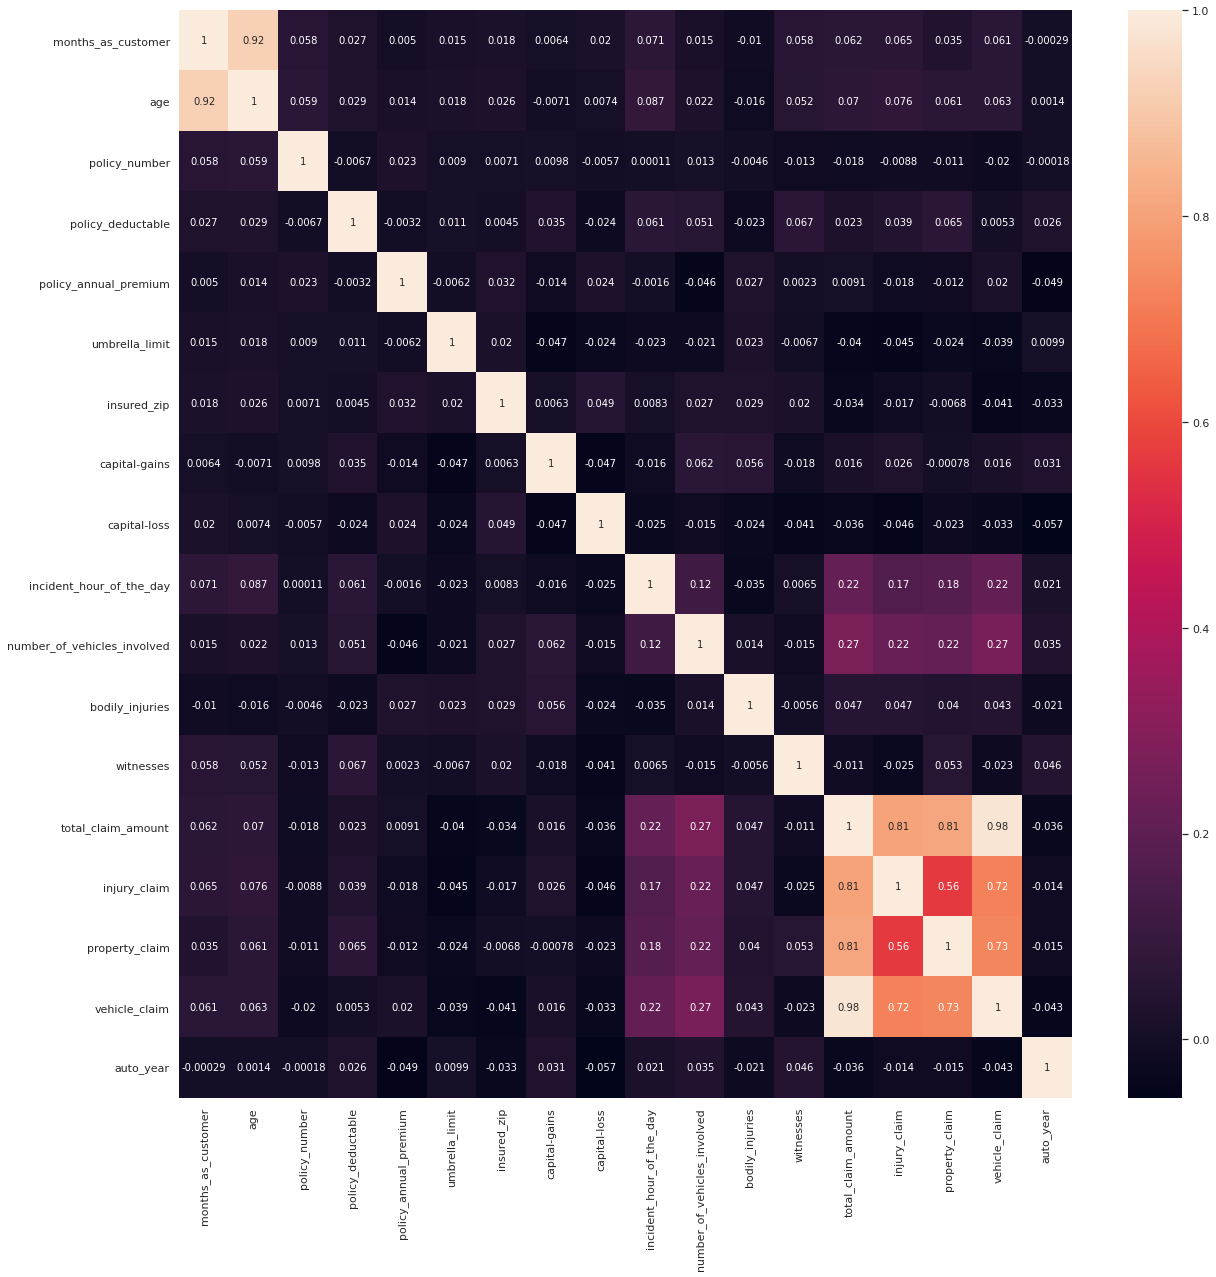

In [ ]:
#correlation among the variables using heatmap
corrdata = data.corr()
ax,fig = plt.subplots(figsize=(20,20))
sns.heatmap(corrdata,annot=True)

The correlation matrix shows us that there exists a relatively high correlation between a few variables. They are:


1.   **Months as customer and age**:This is probably because drivers buy auto insurance when they own a car and this time measure only increases with age.

2.   **Different claims and the total claim amount**:The total claims account for the different claims together. Therefore the correlation between them seems obvious. But since we might need to see the effect of the different claims on the fraud occurance, we keep them all. The fact that total insurance is just the sum of the other 3 is proved below.


      














In [ ]:
#total_claim_amount is the sum of vehicle_claim,property_claim and ingury_claim. Hence the correlation between them is high. therefore we can remove the three other columns and just keep total_claim_amount
# we check this fact by the following
t = data['total_claim_amount'].iloc[1]
v = data['vehicle_claim'].iloc[1]
p = data['property_claim'].iloc[1]
i = data['injury_claim'].iloc[1]

print(t)
v+p+i

5070


5070

Now we will check each variable against the dependent variable to see its individual effect.

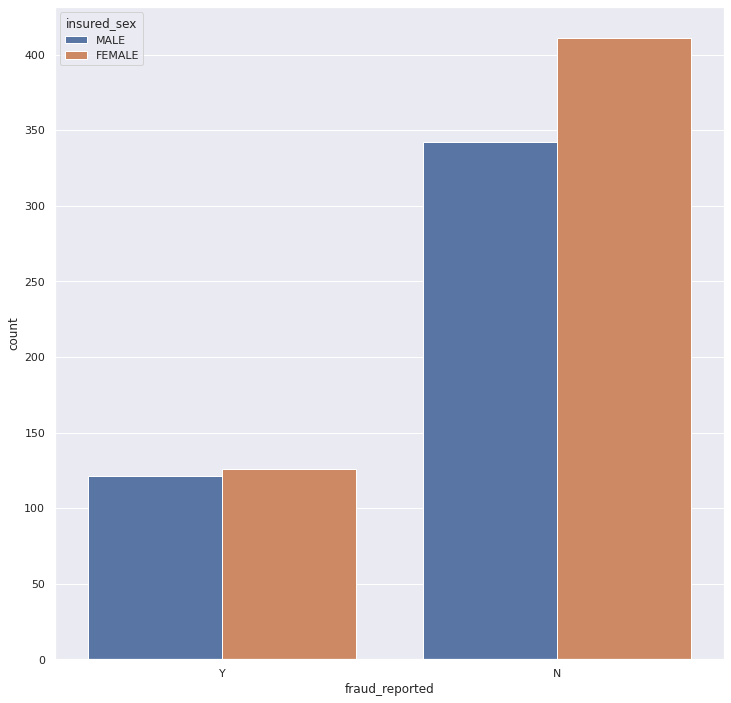

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x=data['fraud_reported'],hue=data['insured_sex'],data=data)

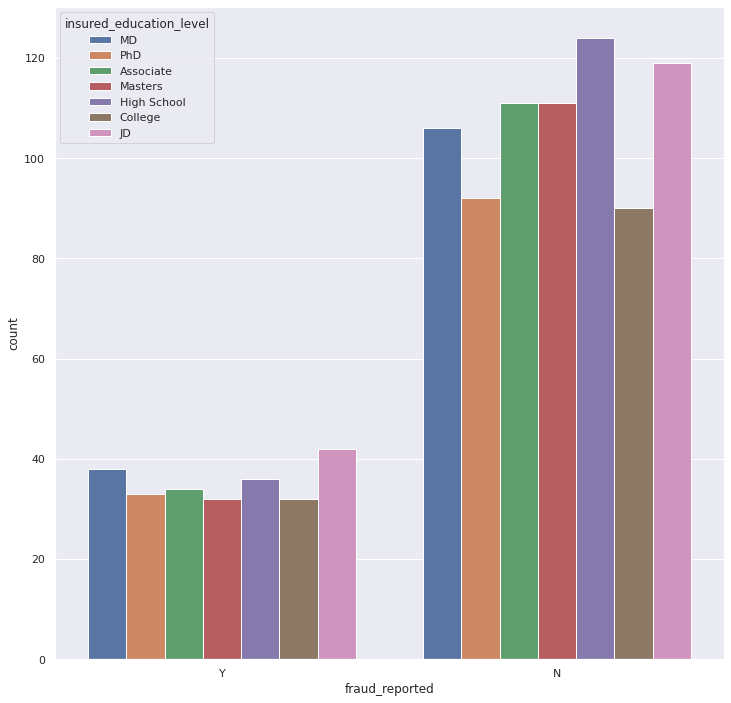

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x=data['fraud_reported'],hue=data['insured_education_level'],data=data)


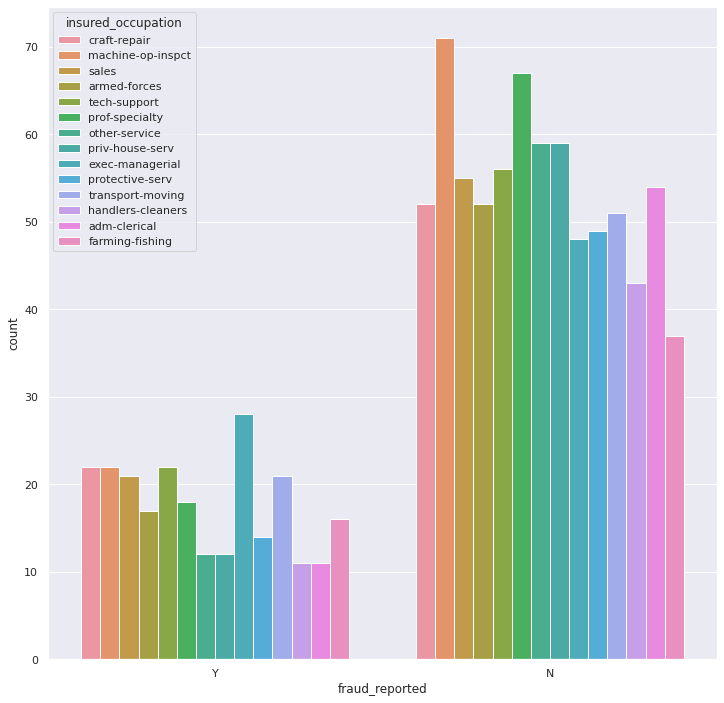

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x=data['fraud_reported'],hue=data['insured_occupation'],data=data)


From the data, it looks like people in exec-managerial positions have more number 
of frauds compared to other occupations.

Sales, tech-support and transport moving also have relatively high cases of fraud.


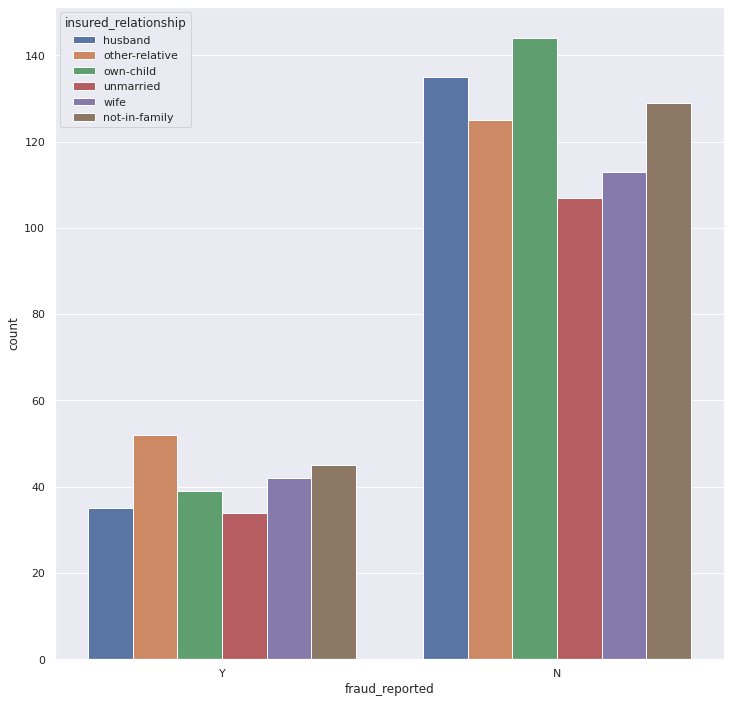

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x=data['fraud_reported'],hue=data['insured_relationship'],data=data)

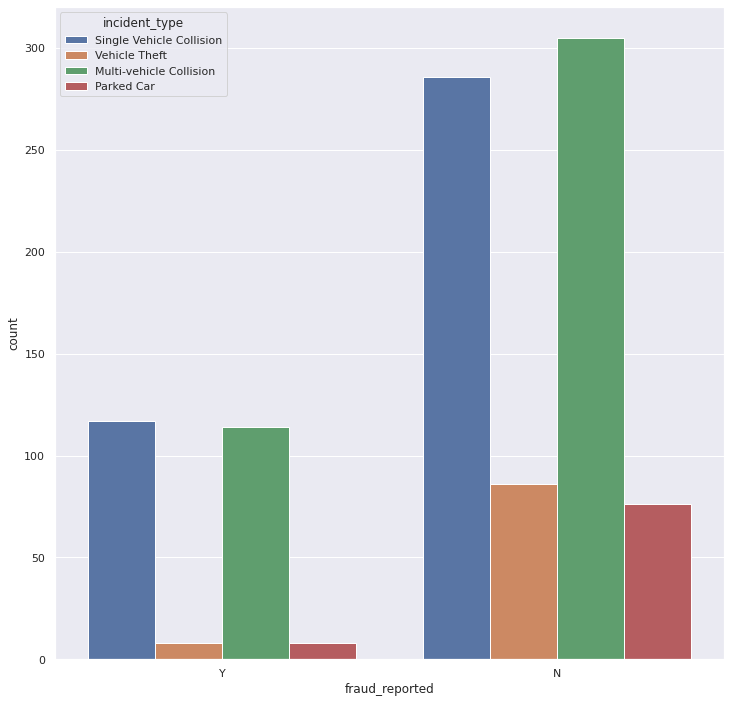

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x=data['fraud_reported'],hue=data['incident_type'],data=data)

Single vehicle and multi vehicle collisions have a lot more number of frauds compared to the parked vehicles. This could be due to the high amount oof damage and causualities caused in collisions. Aong with this, we also see that the total number of collisions is high relative to the parked case.

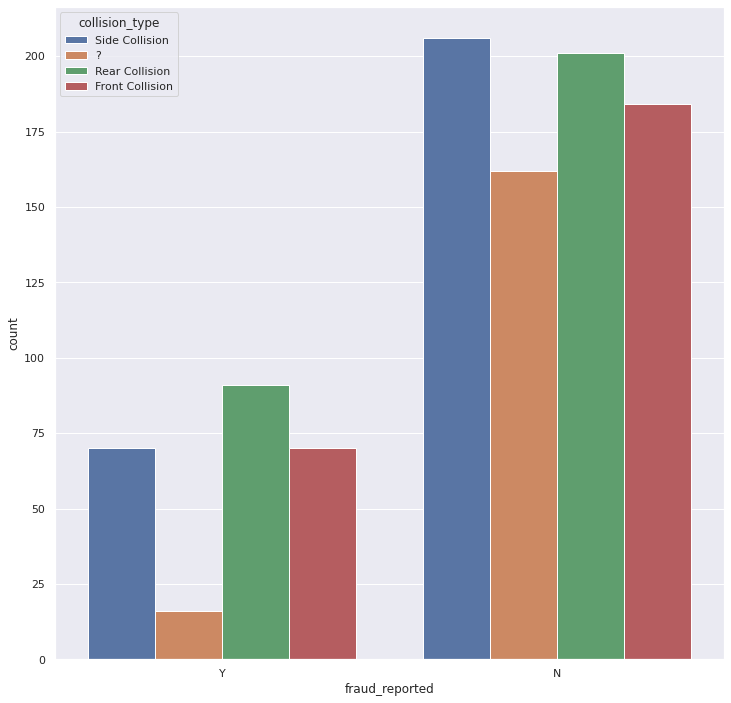

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x=data['fraud_reported'],hue=data['collision_type'],data=data)

While there are significant numbers of false claims in front and side collisions, rear collisions are the highest.

This data is for the US and there, many people use dash cams while driving to record whatever is happening while they drive. In rear collisions, the footage from dash cams is not very helpful to onclusively prove whose mistake it was (insurance owner or other car owner). Maybe that is the reason for more fradulent claims in rear collisions.


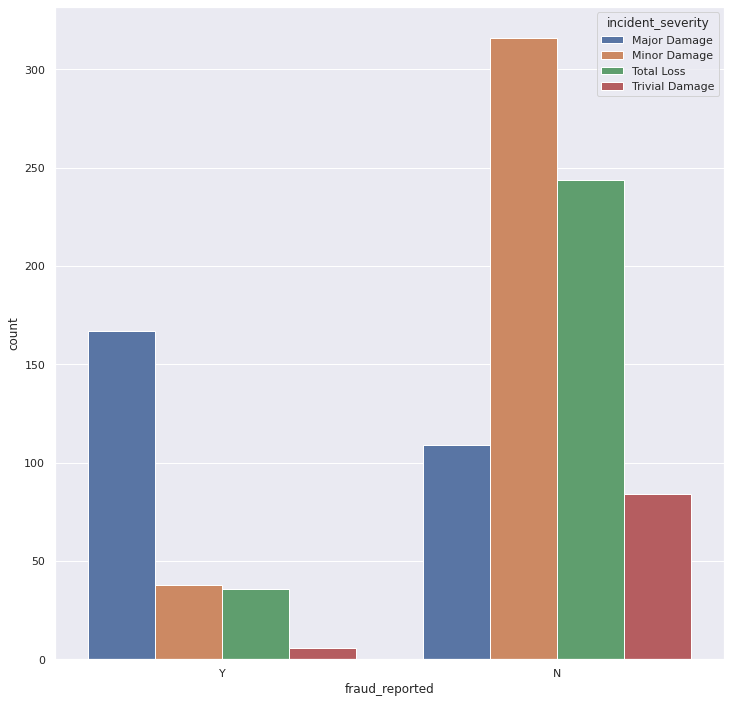

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x=data['fraud_reported'],hue=data['incident_severity'],data=data)

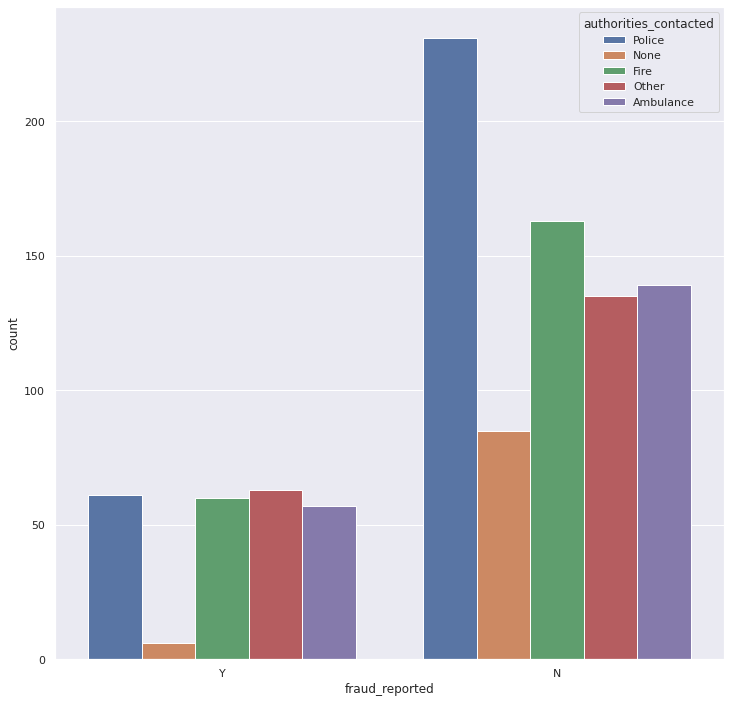

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x=data['fraud_reported'],hue=data['authorities_contacted'],data=data)

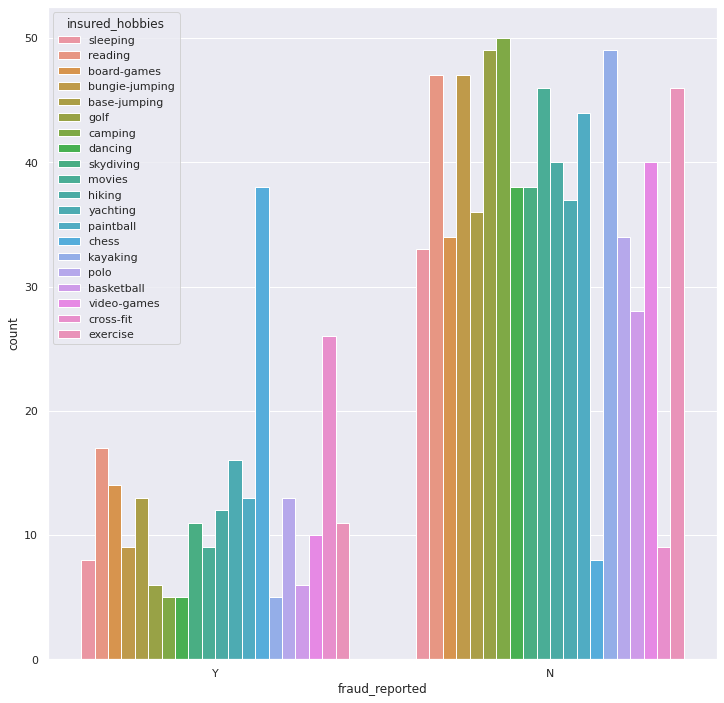

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x=data['fraud_reported'],hue=data['insured_hobbies'],data=data)

While no logical reason can be drawn right now, the number of fraudulent claims by people having chess as a hobby is very high. Cross-fit comes in as a close second

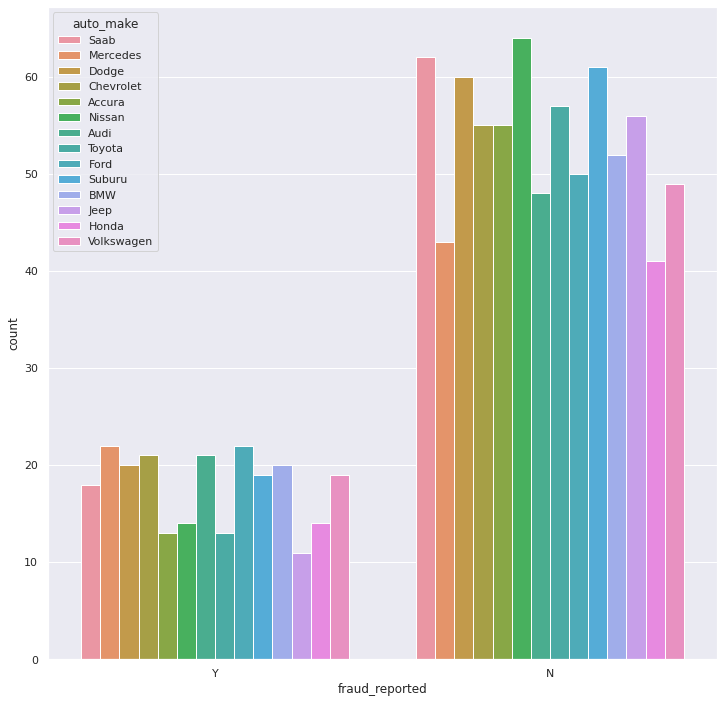

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x=data['fraud_reported'],hue=data['auto_make'],data=data) 

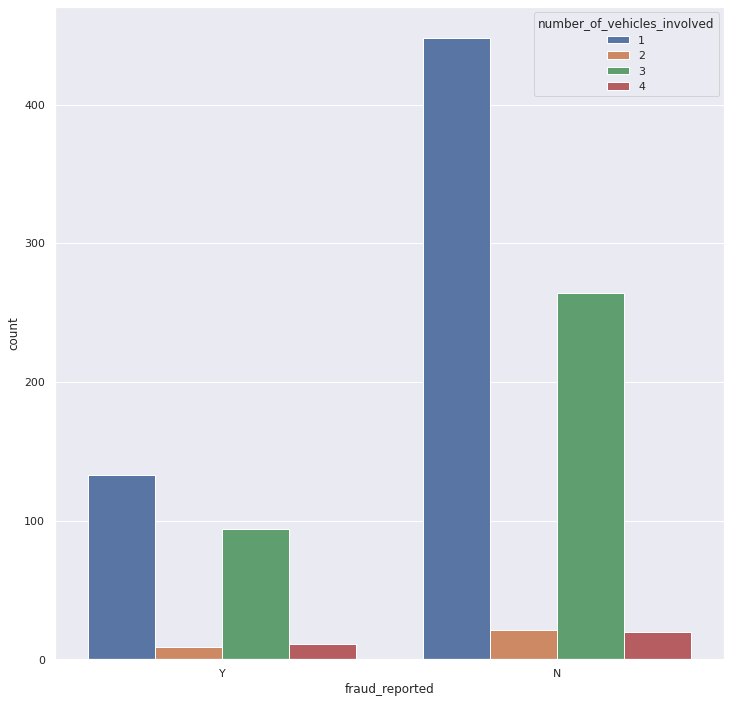

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x=data['fraud_reported'],hue=data['number_of_vehicles_involved'],data=data) 

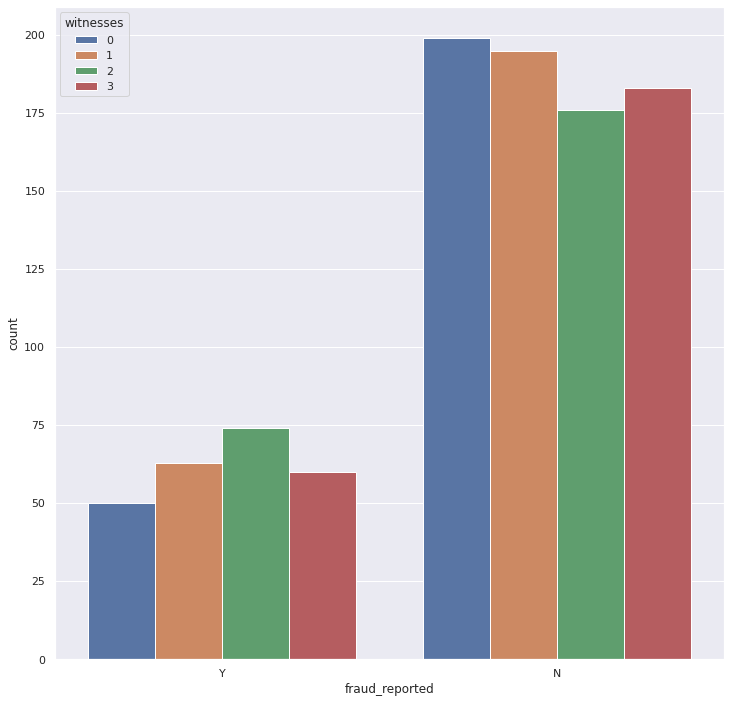

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x=data['fraud_reported'],hue=data['witnesses'],data=data) 

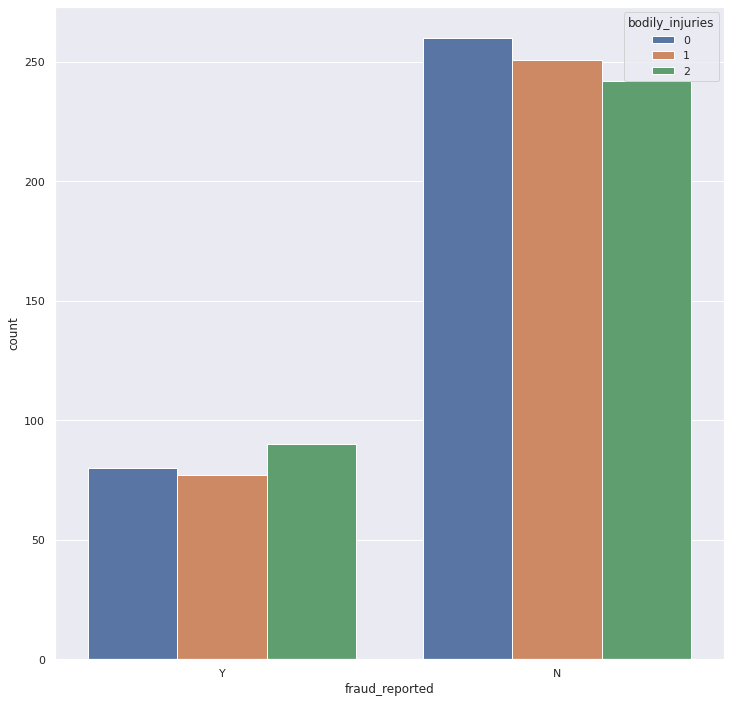

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x=data['fraud_reported'],hue=data['bodily_injuries'],data=data) 

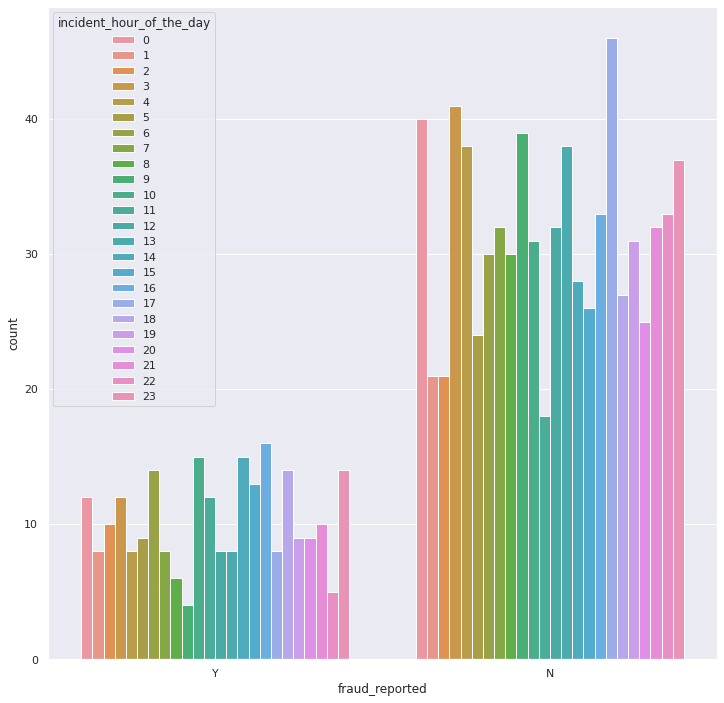

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x=data['fraud_reported'],hue=data['incident_hour_of_the_day'],data=data) 

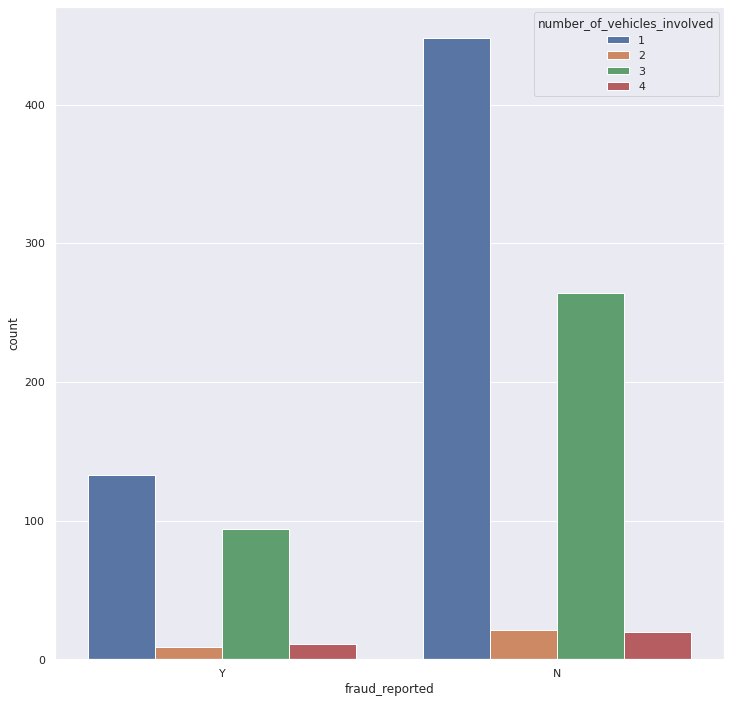

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x=data['fraud_reported'],hue=data['number_of_vehicles_involved'],data=data) 

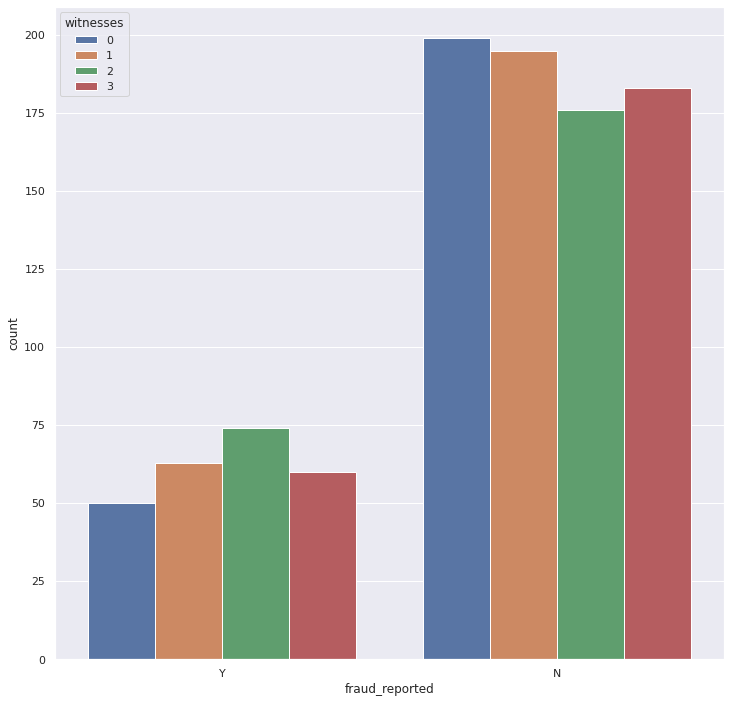

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x=data['fraud_reported'],hue=data['witnesses'],data=data) 

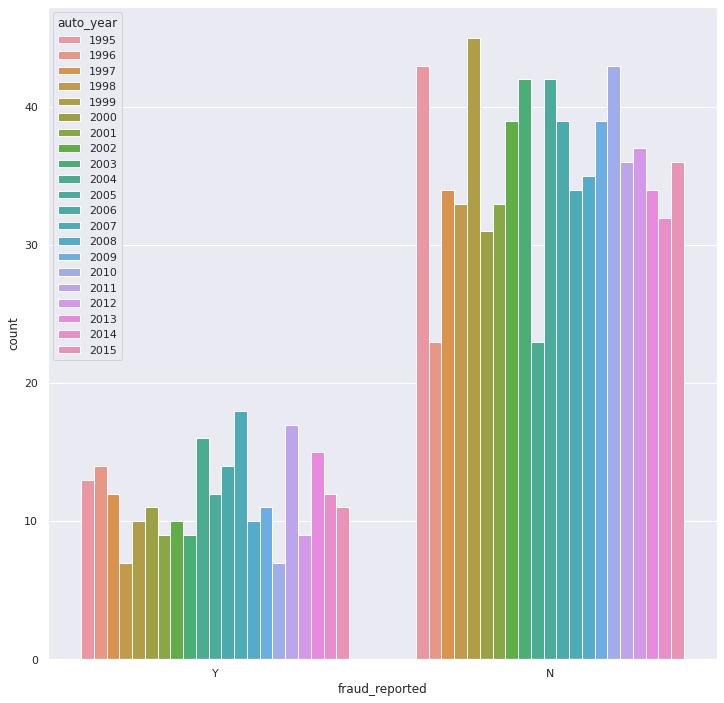

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x=data['fraud_reported'],hue=data['auto_year'],data=data) 

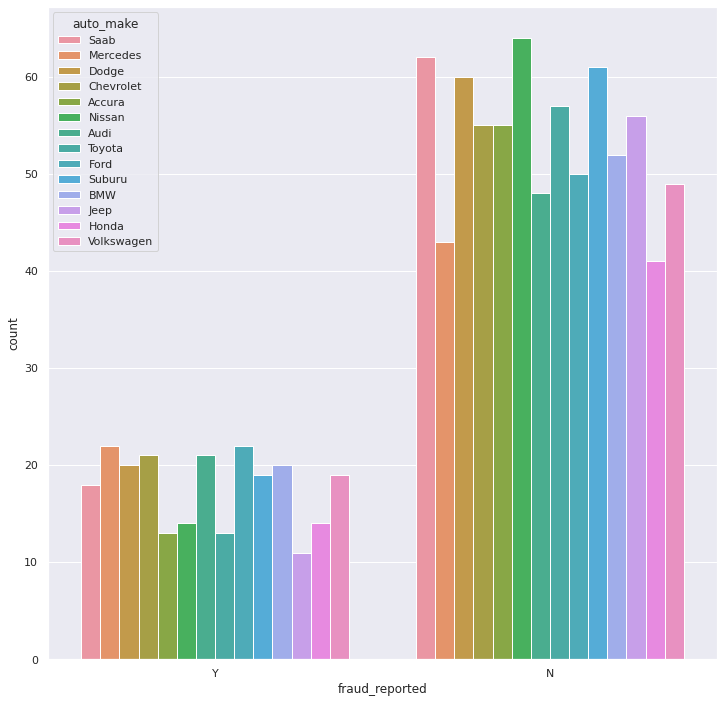

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x=data['fraud_reported'],hue=data['auto_make'],data=data) 

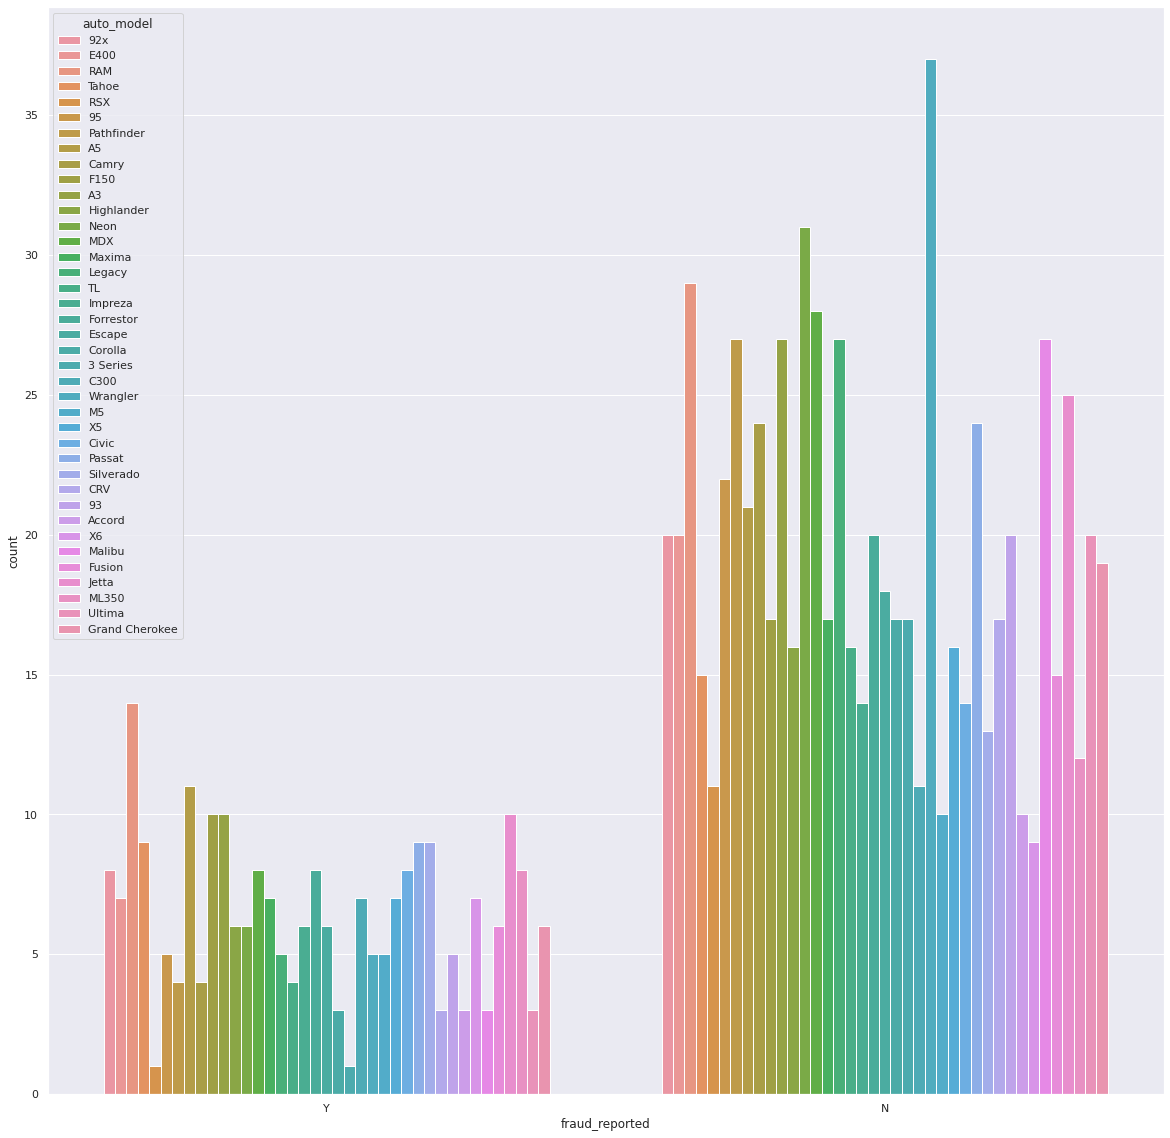

In [ ]:
plt.figure(figsize=(20,20))
sns.countplot(x=data['fraud_reported'],hue=data['auto_model'],data=data) 

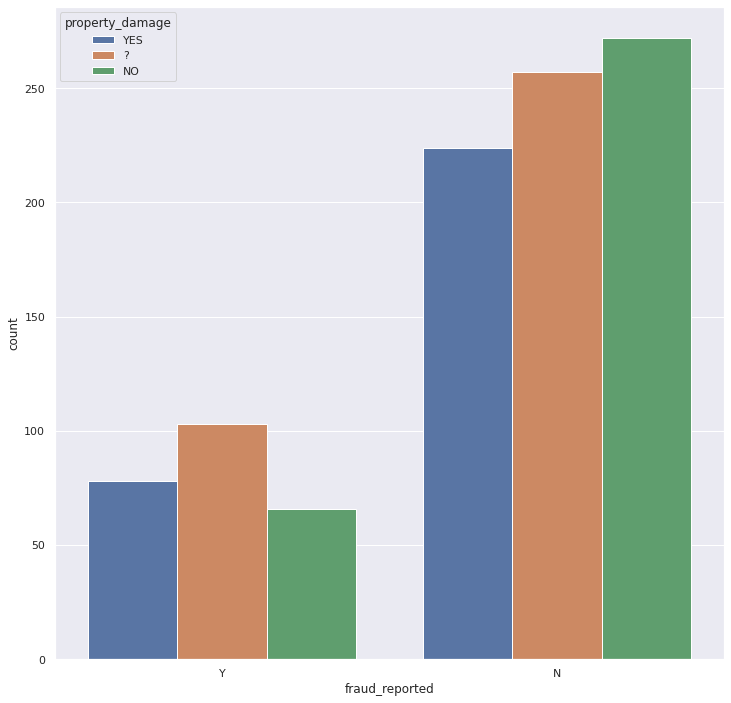

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x=data['fraud_reported'],hue=data['property_damage'],data=data) 

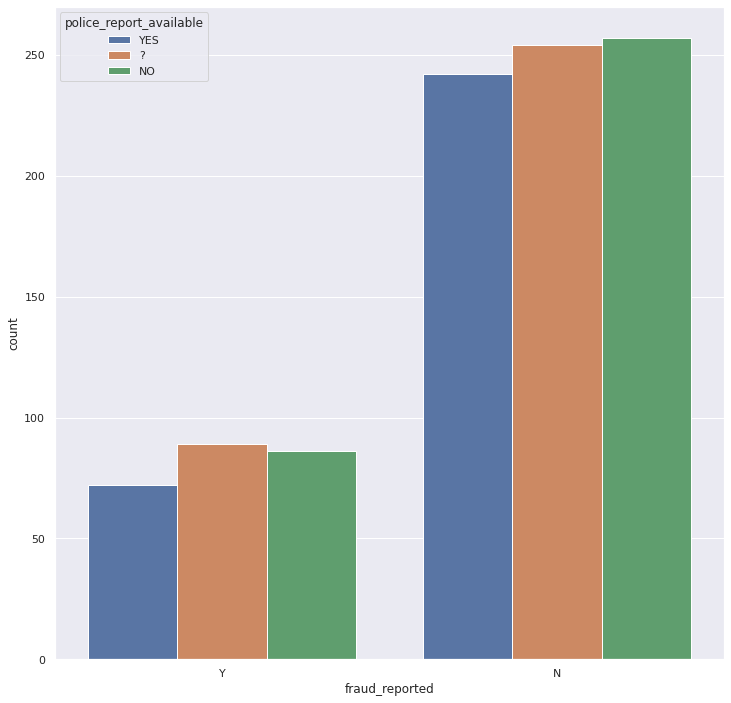

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x=data['fraud_reported'],hue=data['police_report_available'],data=data) 

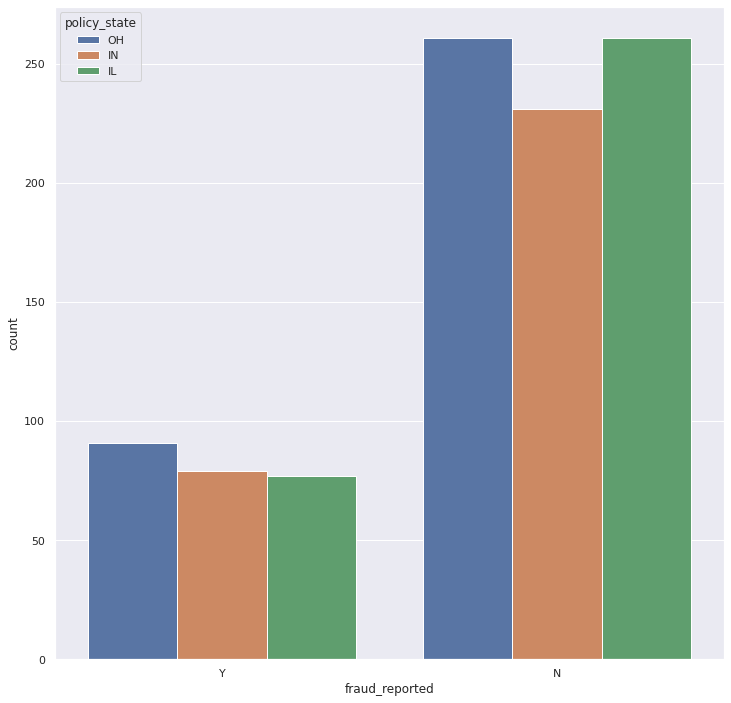

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x=data['fraud_reported'],hue=data['policy_state'],data=data) 

For some variables, we will need to create bins to represent their distribution along with the output variable. We will be plotting the histogram first and then creating the bins and the subsequent coloumn in the database

1) **AGE**

In [ ]:
px.histogram(data,data['age'])

We will create bins to show its distribution against the dependant variable

In [ ]:
bin_labels = ["15-20", "21-25", "26-30", "31-35", "36-40", "41-45", "46-50", "51-55", "56-60", "61-65"]
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]

data["age_group"] = pd.cut(data["age"], bins = bins, labels = bin_labels, include_lowest = True)
data["age_group"]

0      46-50
1      41-45
2      26-30
3      41-45
4      41-45
       ...  
995    36-40
996    41-45
997    31-35
998    61-65
999    56-60
Name: age_group, Length: 1000, dtype: category
Categories (10, object): ['15-20' < '21-25' < '26-30' < '31-35' ... '46-50' < '51-55' < '56-60' < '61-65']

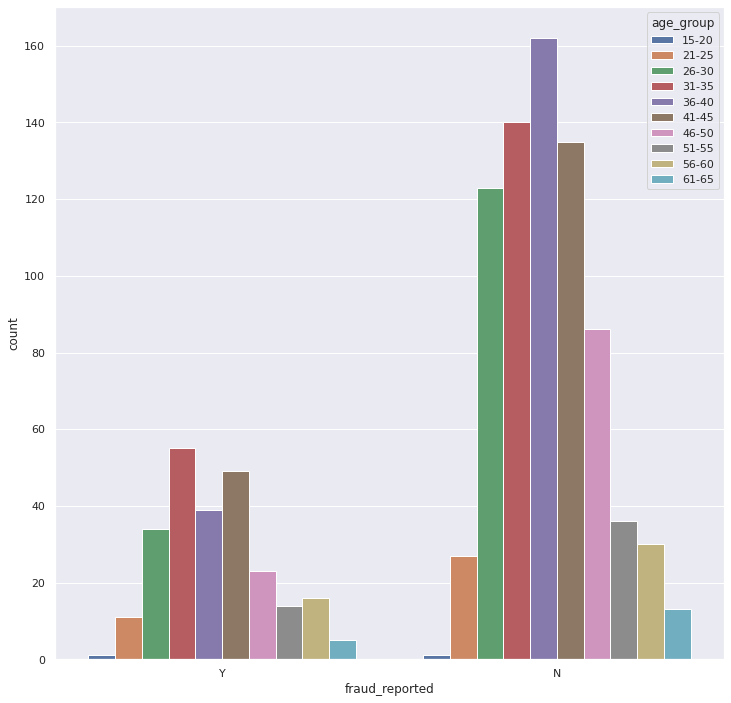

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x=data['fraud_reported'],hue=data['age_group'],data=data) 

**2)MONTHS AS CUSTOMER**

In [ ]:
px.histogram(data,data['months_as_customer'])

In [ ]:
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
bin_labels = ['0-50','51-100','101-150','151-200','201-250','251-300','301-350','351-400','401-450','451-500']

data['months_as_customer_groups'] = pd.cut(data['months_as_customer'], bins = 10, labels = bin_labels, include_lowest= True)
data['months_as_customer_groups']

0      301-350
1      201-250
2      101-150
3      251-300
4      201-250
        ...   
995       0-50
996    251-300
997    101-150
998    451-500
999    451-500
Name: months_as_customer_groups, Length: 1000, dtype: category
Categories (10, object): ['0-50' < '51-100' < '101-150' < '151-200' ... '301-350' < '351-400' <
                          '401-450' < '451-500']

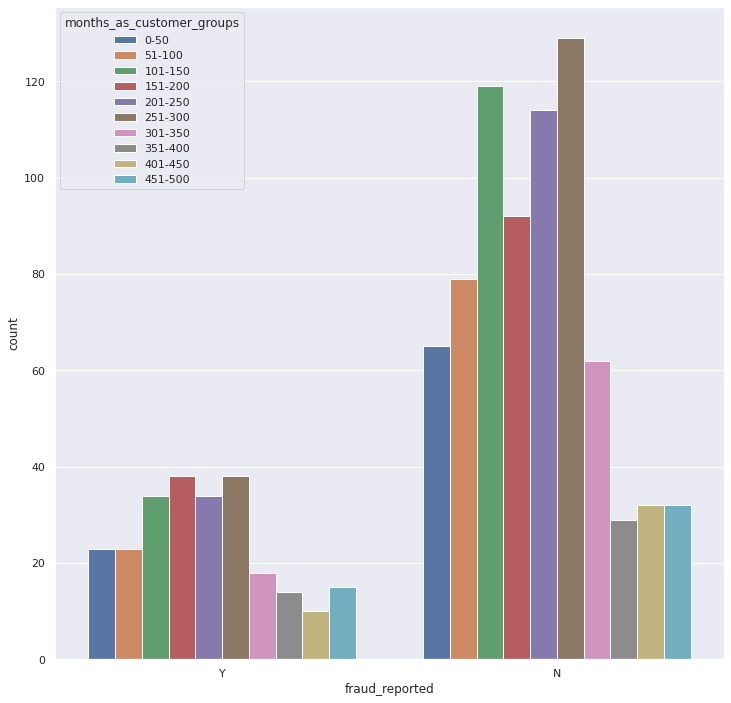

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x=data['fraud_reported'],hue=data['months_as_customer_groups'],data=data) 

**3)TOTAL CLAIM AMOUNT**

In [ ]:
px.histogram(data,data['total_claim_amount'])

In [ ]:
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000]
bin_labels = ['0-20k','20k-40k','40k-60k','60k-80k','80k-100k','100k-120k']
#lower limit in the bin label is not included in the bin
data['total_claim_amount_groups'] = pd.cut(data['total_claim_amount'], bins =bins , labels = bin_labels, include_lowest= True)
data['total_claim_amount_groups']

0        60k-80k
1          0-20k
2        20k-40k
3        60k-80k
4          0-20k
         ...    
995     80k-100k
996    100k-120k
997      60k-80k
998      40k-60k
999        0-20k
Name: total_claim_amount_groups, Length: 1000, dtype: category
Categories (6, object): ['0-20k' < '20k-40k' < '40k-60k' < '60k-80k' < '80k-100k' < '100k-120k']

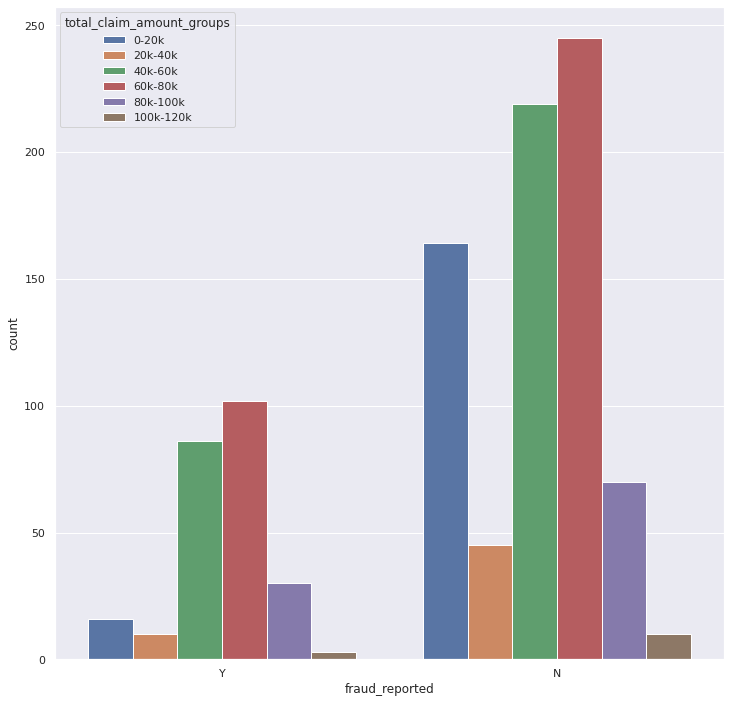

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x=data['fraud_reported'],hue=data['total_claim_amount_groups'],data=data) 

**4)POLICY ANNUAL PREMUIM**

In [ ]:
px.histogram(data,data['policy_annual_premium'])

In [ ]:
bins = list(np.linspace(0,2500, 6, dtype = int))
bin_labels = ['very low', 'low', 'medium', 'high', 'very high']

data['policy_annual_premium_groups'] = pd.cut(data['policy_annual_premium'], bins = bins, labels=bin_labels)
data['policy_annual_premium_groups']

0      medium
1      medium
2      medium
3      medium
4        high
        ...  
995    medium
996    medium
997    medium
998    medium
999       low
Name: policy_annual_premium_groups, Length: 1000, dtype: category
Categories (5, object): ['very low' < 'low' < 'medium' < 'high' < 'very high']

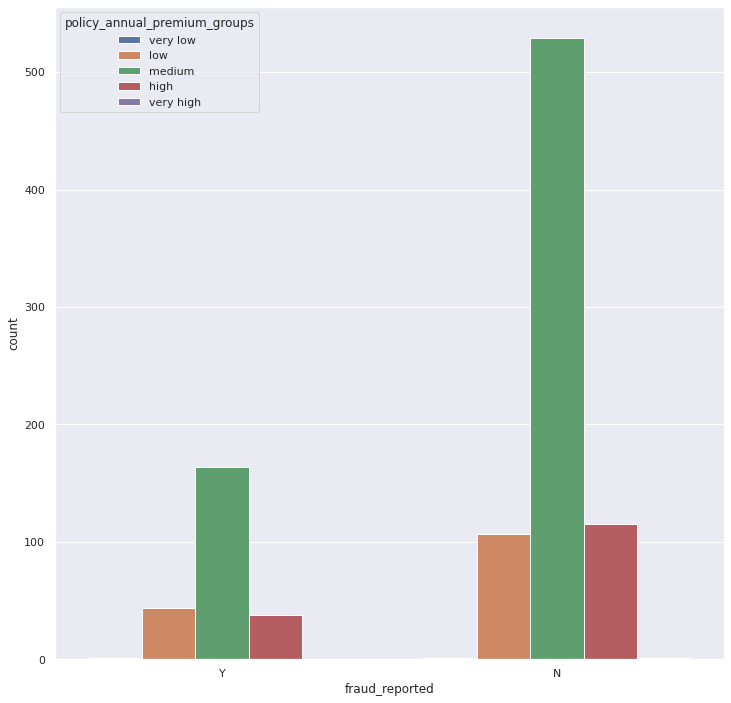

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x=data['fraud_reported'],hue=data['policy_annual_premium_groups'],data=data) 

**5)POLICY DEDUCTABLE**

In [ ]:
px.histogram(data,data['policy_deductable'])

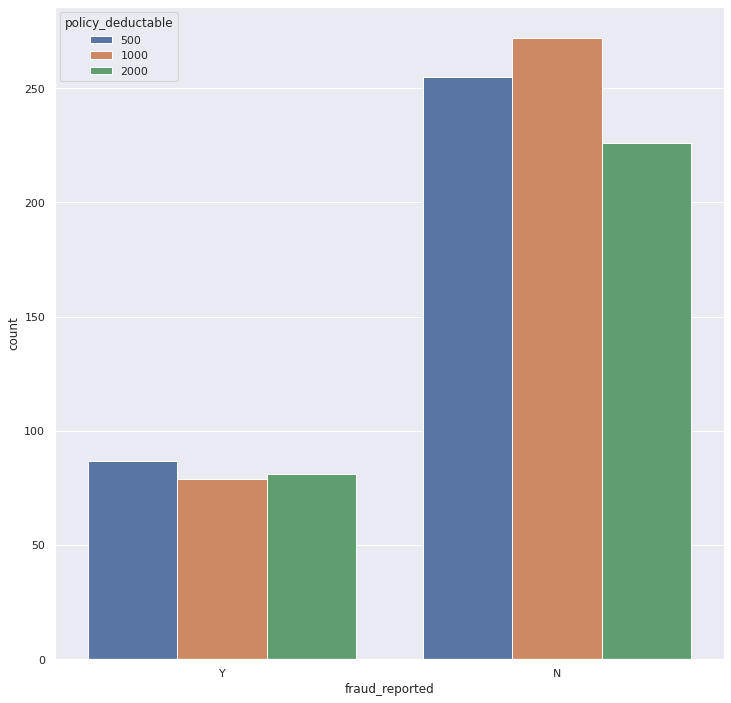

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x=data['fraud_reported'],hue=data['policy_deductable'],data=data) 

**DATA CLEANING**

We will now remove the columns that have all unique values and hence cannot contribute to the model.
We dropped the policy_bind_date, incident_location and policy_number features.

We also drop the 4 features which have been classified into bins during visualisation

In [ ]:
data_re=data.drop('policy_number',axis=1)
data_re=data_re.drop('policy_bind_date',axis=1)
data_re=data_re.drop('incident_location',axis=1)
data_re=data_re.drop('age',axis=1)
data_re=data_re.drop('months_as_customer',axis=1)
data_re=data_re.drop('policy_annual_premium',axis=1)
data_re=data_re.drop('total_claim_amount',axis=1)


data.info()
data_re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   months_as_customer            1000 non-null   int64   
 1   age                           1000 non-null   int64   
 2   policy_number                 1000 non-null   int64   
 3   policy_bind_date              1000 non-null   object  
 4   policy_state                  1000 non-null   object  
 5   policy_csl                    1000 non-null   object  
 6   policy_deductable             1000 non-null   int64   
 7   policy_annual_premium         1000 non-null   float64 
 8   umbrella_limit                1000 non-null   int64   
 9   insured_zip                   1000 non-null   int64   
 10  insured_sex                   1000 non-null   object  
 11  insured_education_level       1000 non-null   object  
 12  insured_occupation            1000 non-null   obj

Now data_re is the dataset that we'll work on. It is the one that has 36 coloumns now.


In [ ]:
data_re

,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,age_group,months_as_customer_groups,total_claim_amount_groups,policy_annual_premium_groups
0,OH,250/500,1000,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,6510,13020,52080,Saab,92x,2004,Y,46-50,301-350,60k-80k,medium
1,IN,250/500,2000,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,?,780,780,3510,Mercedes,E400,2007,Y,41-45,201-250,0-20k,medium
2,OH,100/300,2000,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,7700,3850,23100,Dodge,RAM,2007,N,26-30,101-150,20k-40k,medium
3,IL,250/500,2000,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,?,1,2,NO,6340,6340,50720,Chevrolet,Tahoe,2014,Y,41-45,251-300,60k-80k,medium
4,IL,500/1000,1000,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,1300,650,4550,Accura,RSX,2009,N,41-45,201-250,0-20k,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,OH,500/1000,1000,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,20,1,YES,0,1,?,17440,8720,61040,Honda,Accord,2006,N,36-40,0-50,80k-100k,medium
996,IL,100/300,1000,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,23,1,YES,2,3,?,18080,18080,72320,Volkswagen,Passat,2015,N,41-45,251-300,100k-120k,medium
997,OH,250/500,500,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,4,3,?,2,3,YES,7500,7500,52500,Suburu,Impreza,1996,N,31-35,101-150,60k-80k,medium
998,IL,500/1000,2000,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,2,1,?,0,1,YES,5220,5220,36540,Audi,A5,1998,N,61-65,451-500,40k-60k,medium


Some of our features need to be normalised, therefore we will first normalise the data

In [ ]:

data_norm=pd.concat([data['umbrella_limit'],data['capital-gains'],data['capital-loss'],data['injury_claim'],data['vehicle_claim'],data['property_claim']],axis=1)
names=data_norm.columns
scaler=preprocessing.MinMaxScaler(feature_range=(0,2))
d=scaler.fit_transform(data_norm)
scaled_data=pd.DataFrame(d,columns=names)
d
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   umbrella_limit  1000 non-null   float64
 1   capital-gains   1000 non-null   float64
 2   capital-loss    1000 non-null   float64
 3   injury_claim    1000 non-null   float64
 4   vehicle_claim   1000 non-null   float64
 5   property_claim  1000 non-null   float64
dtypes: float64(6)
memory usage: 47.0 KB


In [ ]:
data_re=data_re.drop(['umbrella_limit'],axis=1)
data_re=data_re.drop(['capital-gains'],axis=1)
data_re=data_re.drop(['capital-loss'],axis=1)
data_re=data_re.drop(['injury_claim'],axis=1)
data_re=data_re.drop(['vehicle_claim'],axis=1)
data_re=data_re.drop(['property_claim'],axis=1)
data_re



,policy_state,policy_csl,policy_deductable,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,auto_make,auto_model,auto_year,fraud_reported,age_group,months_as_customer_groups,total_claim_amount_groups,policy_annual_premium_groups
0,OH,250/500,1000,466132,MALE,MD,craft-repair,sleeping,husband,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,Saab,92x,2004,Y,46-50,301-350,60k-80k,medium
1,IN,250/500,2000,468176,MALE,MD,machine-op-inspct,reading,other-relative,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,?,Mercedes,E400,2007,Y,41-45,201-250,0-20k,medium
2,OH,100/300,2000,430632,FEMALE,PhD,sales,board-games,own-child,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,Dodge,RAM,2007,N,26-30,101-150,20k-40k,medium
3,IL,250/500,2000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,?,1,2,NO,Chevrolet,Tahoe,2014,Y,41-45,251-300,60k-80k,medium
4,IL,500/1000,1000,610706,MALE,Associate,sales,board-games,unmarried,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,Accura,RSX,2009,N,41-45,201-250,0-20k,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,OH,500/1000,1000,431289,FEMALE,Masters,craft-repair,paintball,unmarried,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,20,1,YES,0,1,?,Honda,Accord,2006,N,36-40,0-50,80k-100k,medium
996,IL,100/300,1000,608177,FEMALE,PhD,prof-specialty,sleeping,wife,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,23,1,YES,2,3,?,Volkswagen,Passat,2015,N,41-45,251-300,100k-120k,medium
997,OH,250/500,500,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,4,3,?,2,3,YES,Suburu,Impreza,1996,N,31-35,101-150,60k-80k,medium
998,IL,500/1000,2000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,2,1,?,0,1,YES,Audi,A5,1998,N,61-65,451-500,40k-60k,medium


In [ ]:
data_re=pd.concat([data_re,scaled_data],axis=1)
data_re

,policy_state,policy_csl,policy_deductable,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,auto_make,auto_model,auto_year,fraud_reported,age_group,months_as_customer_groups,total_claim_amount_groups,policy_annual_premium_groups,umbrella_limit,capital-gains,capital-loss,injury_claim,vehicle_claim,property_claim
0,OH,250/500,1000,466132,MALE,MD,craft-repair,sleeping,husband,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,Saab,92x,2004,Y,46-50,301-350,60k-80k,medium,0.181818,1.060697,2.000000,0.606993,1.308592,1.100127
1,IN,250/500,2000,468176,MALE,MD,machine-op-inspct,reading,other-relative,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,?,Mercedes,E400,2007,Y,41-45,201-250,0-20k,medium,1.090909,0.000000,2.000000,0.072727,0.086552,0.065906
2,OH,100/300,2000,430632,FEMALE,PhD,sales,board-games,own-child,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,Dodge,RAM,2007,N,26-30,101-150,20k-40k,medium,1.090909,0.698507,2.000000,0.717949,0.579444,0.325306
3,IL,250/500,2000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,?,1,2,NO,Chevrolet,Tahoe,2014,Y,41-45,251-300,60k-80k,medium,1.272727,0.973134,0.876688,0.591142,1.274374,0.535699
4,IL,500/1000,1000,610706,MALE,Associate,sales,board-games,unmarried,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,Accura,RSX,2009,N,41-45,201-250,0-20k,high,1.272727,1.313433,1.171917,0.121212,0.112719,0.054922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,OH,500/1000,1000,431289,FEMALE,Masters,craft-repair,paintball,unmarried,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,20,1,YES,0,1,?,Honda,Accord,2006,N,36-40,0-50,80k-100k,medium,0.181818,0.000000,2.000000,1.626107,1.534029,0.736798
996,IL,100/300,1000,608177,FEMALE,PhD,prof-specialty,sleeping,wife,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,23,1,YES,2,3,?,Volkswagen,Passat,2015,N,41-45,251-300,100k-120k,medium,0.181818,1.410945,2.000000,1.685781,1.817839,1.527672
997,OH,250/500,500,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,4,3,?,2,3,YES,Suburu,Impreza,1996,N,31-35,101-150,60k-80k,medium,0.727273,0.698507,2.000000,0.699301,1.319160,0.633714
998,IL,500/1000,2000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,2,1,?,0,1,YES,Audi,A5,1998,N,61-65,451-500,40k-60k,medium,1.090909,0.000000,2.000000,0.486713,0.917600,0.441065


Encoding Data: Using One-Hot Encoding for features with data type as object.

In [ ]:
#One-hot encoding of data
encoded_col1=pd.get_dummies(data.policy_state, prefix='state')
encoded_col2=pd.get_dummies(data.policy_csl, prefix='csl')
encoded_col3=pd.get_dummies(data.insured_sex, prefix='sex')
encoded_col4=pd.get_dummies(data.insured_education_level, prefix='education')
encoded_col5=pd.get_dummies(data.insured_occupation, prefix='occupation')
encoded_col6=pd.get_dummies(data.insured_hobbies, prefix='hobby')
encoded_col7=pd.get_dummies(data.insured_relationship, prefix='relation')
encoded_col8=pd.get_dummies(data.incident_type, prefix='incident_type')
encoded_col9=pd.get_dummies(data.collision_type, prefix='collision_type')
encoded_col10=pd.get_dummies(data.incident_date, prefix='incident_date')
encoded_col11=pd.get_dummies(data.incident_severity, prefix='severity')
encoded_col12=pd.get_dummies(data.authorities_contacted, prefix='authorities_contacted')
encoded_col13=pd.get_dummies(data.incident_state, prefix='incident_state')
encoded_col14=pd.get_dummies(data.incident_city, prefix='incident_city')
encoded_col15=pd.get_dummies(data.incident_hour_of_the_day, prefix='incident_houroftheday')
encoded_col16=pd.get_dummies(data.property_damage, prefix='property_damage')
encoded_col17=pd.get_dummies(data.police_report_available, prefix='police_report')
encoded_col18=pd.get_dummies(data.auto_make, prefix='auto_make')
encoded_col19=pd.get_dummies(data.auto_model, prefix='model')
encoded_col20=pd.get_dummies(data.age_group, prefix='age_group')
encoded_col21=pd.get_dummies(data.months_as_customer_groups, prefix='months_as_customer')
encoded_col22=pd.get_dummies(data.total_claim_amount_groups, prefix='total_claim_amount')
encoded_col23=pd.get_dummies(data.policy_annual_premium_groups, prefix='policy_annual_premium')
encoded_col24=pd.get_dummies(data.policy_deductable, prefix='policy_deductable')
encoded_col25=pd.get_dummies(data.number_of_vehicles_involved, prefix='number_of_vehicles_involved')
encoded_col26=pd.get_dummies(data.bodily_injuries, prefix='level_of_bodily_injuries')
encoded_col27=pd.get_dummies(data.witnesses, prefix='number_witnesses')
encoded_col28=pd.get_dummies(data.auto_year, prefix='auto_year')
encoded_col29=pd.get_dummies(data.fraud_reported, prefix='fraud_reported')

data_re=pd.concat([data_re,encoded_col1,encoded_col2,encoded_col3,encoded_col4,encoded_col5,encoded_col6,encoded_col7,encoded_col8,encoded_col9,encoded_col10,encoded_col11,encoded_col12,encoded_col13,encoded_col14,encoded_col15,encoded_col16,encoded_col17,encoded_col18,encoded_col19,encoded_col20,encoded_col21,encoded_col22,encoded_col23,encoded_col24,encoded_col25,encoded_col26,encoded_col27,encoded_col28,encoded_col29],axis=1)
print(data_re)



    policy_state policy_csl  ...  fraud_reported_N  fraud_reported_Y
0             OH    250/500  ...                 0                 1
1             IN    250/500  ...                 0                 1
2             OH    100/300  ...                 1                 0
3             IL    250/500  ...                 0                 1
4             IL   500/1000  ...                 1                 0
..           ...        ...  ...               ...               ...
995           OH   500/1000  ...                 1                 0
996           IL    100/300  ...                 1                 0
997           OH    250/500  ...                 1                 0
998           IL   500/1000  ...                 1                 0
999           OH    250/500  ...                 1                 0

[1000 rows x 333 columns]


In [ ]:
#dropping encoded features
data_re_1=data_re.drop(['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','incident_date','incident_severity','collision_type','authorities_contacted','incident_state','incident_city','property_damage','police_report_available','auto_make','auto_model','fraud_reported','age_group','months_as_customer_groups','total_claim_amount_groups','policy_annual_premium_groups','incident_hour_of_the_day','policy_deductable','number_of_vehicles_involved','bodily_injuries','witnesses','auto_year'],axis=1)
print(data_re_1)

(data_re_1)

     insured_zip  umbrella_limit  ...  fraud_reported_N  fraud_reported_Y
0         466132        0.181818  ...                 0                 1
1         468176        1.090909  ...                 0                 1
2         430632        1.090909  ...                 1                 0
3         608117        1.272727  ...                 0                 1
4         610706        1.272727  ...                 1                 0
..           ...             ...  ...               ...               ...
995       431289        0.181818  ...                 1                 0
996       608177        0.181818  ...                 1                 0
997       442797        0.727273  ...                 1                 0
998       441714        1.090909  ...                 1                 0
999       612260        0.181818  ...                 1                 0

[1000 rows x 304 columns]


,insured_zip,umbrella_limit,capital-gains,capital-loss,injury_claim,vehicle_claim,property_claim,state_IL,state_IN,state_OH,csl_100/300,csl_250/500,csl_500/1000,sex_FEMALE,sex_MALE,education_Associate,education_College,education_High School,education_JD,education_MD,education_Masters,education_PhD,occupation_adm-clerical,occupation_armed-forces,occupation_craft-repair,occupation_exec-managerial,occupation_farming-fishing,occupation_handlers-cleaners,occupation_machine-op-inspct,occupation_other-service,occupation_priv-house-serv,occupation_prof-specialty,occupation_protective-serv,occupation_sales,occupation_tech-support,occupation_transport-moving,hobby_base-jumping,hobby_basketball,hobby_board-games,hobby_bungie-jumping,...,policy_annual_premium_medium,policy_annual_premium_high,policy_annual_premium_very high,policy_deductable_500,policy_deductable_1000,policy_deductable_2000,number_of_vehicles_involved_1,number_of_vehicles_involved_2,number_of_vehicles_involved_3,number_of_vehicles_involved_4,level_of_bodily_injuries_0,level_of_bodily_injuries_1,level_of_bodily_injuries_2,number_witnesses_0,number_witnesses_1,number_witnesses_2,number_witnesses_3,auto_year_1995,auto_year_1996,auto_year_1997,auto_year_1998,auto_year_1999,auto_year_2000,auto_year_2001,auto_year_2002,auto_year_2003,auto_year_2004,auto_year_2005,auto_year_2006,auto_year_2007,auto_year_2008,auto_year_2009,auto_year_2010,auto_year_2011,auto_year_2012,auto_year_2013,auto_year_2014,auto_year_2015,fraud_reported_N,fraud_reported_Y
0,466132,0.181818,1.060697,2.000000,0.606993,1.308592,1.100127,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,468176,1.090909,0.000000,2.000000,0.072727,0.086552,0.065906,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,430632,1.090909,0.698507,2.000000,0.717949,0.579444,0.325306,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,608117,1.272727,0.973134,0.876688,0.591142,1.274374,0.535699,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,610706,1.272727,1.313433,1.171917,0.121212,0.112719,0.054922,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,431289,0.181818,0.000000,2.000000,1.626107,1.534029,0.736798,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
996,608177,0.181818,1.410945,2.000000,1.685781,1.817839,1.527672,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
997,442797,0.727273,0.698507,2.000000,0.699301,1.319160,0.633714,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
998,441714,1.090909,0.000000,2.000000,0.486713,0.917600,0.441065,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


Separating dataset into training and testing data

In [ ]:
X=data_re_1.iloc[0:1000,0:302]
Y=data_re_1.iloc[0:1000,302:304]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=2,stratify=Y)

X_train,X_test,Y_train,Y_test

(     insured_zip  umbrella_limit  ...  auto_year_2014  auto_year_2015
 579       461264        0.181818  ...               0               0
 222       431121        0.181818  ...               0               0
 624       462250        0.181818  ...               0               0
 234       451560        0.181818  ...               0               1
 938       468232        1.272727  ...               0               0
 ..           ...             ...  ...             ...             ...
 771       614169        0.181818  ...               0               0
 553       616884        0.181818  ...               0               0
 547       603882        0.181818  ...               0               0
 603       466691        0.909091  ...               0               0
 126       435758        0.181818  ...               0               0
 
 [750 rows x 302 columns],
      insured_zip  umbrella_limit  ...  auto_year_2014  auto_year_2015
 77        600648        0.181818  ...          

In [ ]:
training=[X_train,Y_train]
testing=[X_test,Y_test]

data_training=pd.concat(training,axis=1)
data_testing=pd.concat(testing,axis=1)

data_training 
data_testing

,insured_zip,umbrella_limit,capital-gains,capital-loss,injury_claim,vehicle_claim,property_claim,state_IL,state_IN,state_OH,csl_100/300,csl_250/500,csl_500/1000,sex_FEMALE,sex_MALE,education_Associate,education_College,education_High School,education_JD,education_MD,education_Masters,education_PhD,occupation_adm-clerical,occupation_armed-forces,occupation_craft-repair,occupation_exec-managerial,occupation_farming-fishing,occupation_handlers-cleaners,occupation_machine-op-inspct,occupation_other-service,occupation_priv-house-serv,occupation_prof-specialty,occupation_protective-serv,occupation_sales,occupation_tech-support,occupation_transport-moving,hobby_base-jumping,hobby_basketball,hobby_board-games,hobby_bungie-jumping,...,policy_annual_premium_medium,policy_annual_premium_high,policy_annual_premium_very high,policy_deductable_500,policy_deductable_1000,policy_deductable_2000,number_of_vehicles_involved_1,number_of_vehicles_involved_2,number_of_vehicles_involved_3,number_of_vehicles_involved_4,level_of_bodily_injuries_0,level_of_bodily_injuries_1,level_of_bodily_injuries_2,number_witnesses_0,number_witnesses_1,number_witnesses_2,number_witnesses_3,auto_year_1995,auto_year_1996,auto_year_1997,auto_year_1998,auto_year_1999,auto_year_2000,auto_year_2001,auto_year_2002,auto_year_2003,auto_year_2004,auto_year_2005,auto_year_2006,auto_year_2007,auto_year_2008,auto_year_2009,auto_year_2010,auto_year_2011,auto_year_2012,auto_year_2013,auto_year_2014,auto_year_2015,fraud_reported_N,fraud_reported_Y
77,600648,0.181818,0.000000,2.000000,1.012587,0.954585,0.917617,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
966,472223,1.090909,0.000000,2.000000,0.586480,1.106051,1.062949,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
764,462767,0.181818,0.421891,2.000000,1.191608,1.123663,1.079848,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
261,446895,0.181818,0.000000,2.000000,0.550117,1.185810,0.498521,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
748,606249,0.181818,0.993035,0.871287,0.921212,0.868285,0.417406,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,603260,0.181818,1.321393,0.853285,1.046154,1.127437,0.948035,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
376,479913,0.181818,0.000000,0.453645,0.617249,1.330733,0.559358,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
200,430714,0.181818,0.000000,2.000000,0.089510,0.094855,0.081115,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
259,613287,0.181818,0.000000,2.000000,0.495105,0.933451,0.448669,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
data_re_1

,insured_zip,umbrella_limit,capital-gains,capital-loss,injury_claim,vehicle_claim,property_claim,state_IL,state_IN,state_OH,csl_100/300,csl_250/500,csl_500/1000,sex_FEMALE,sex_MALE,education_Associate,education_College,education_High School,education_JD,education_MD,education_Masters,education_PhD,occupation_adm-clerical,occupation_armed-forces,occupation_craft-repair,occupation_exec-managerial,occupation_farming-fishing,occupation_handlers-cleaners,occupation_machine-op-inspct,occupation_other-service,occupation_priv-house-serv,occupation_prof-specialty,occupation_protective-serv,occupation_sales,occupation_tech-support,occupation_transport-moving,hobby_base-jumping,hobby_basketball,hobby_board-games,hobby_bungie-jumping,...,policy_annual_premium_medium,policy_annual_premium_high,policy_annual_premium_very high,policy_deductable_500,policy_deductable_1000,policy_deductable_2000,number_of_vehicles_involved_1,number_of_vehicles_involved_2,number_of_vehicles_involved_3,number_of_vehicles_involved_4,level_of_bodily_injuries_0,level_of_bodily_injuries_1,level_of_bodily_injuries_2,number_witnesses_0,number_witnesses_1,number_witnesses_2,number_witnesses_3,auto_year_1995,auto_year_1996,auto_year_1997,auto_year_1998,auto_year_1999,auto_year_2000,auto_year_2001,auto_year_2002,auto_year_2003,auto_year_2004,auto_year_2005,auto_year_2006,auto_year_2007,auto_year_2008,auto_year_2009,auto_year_2010,auto_year_2011,auto_year_2012,auto_year_2013,auto_year_2014,auto_year_2015,fraud_reported_N,fraud_reported_Y
0,466132,0.181818,1.060697,2.000000,0.606993,1.308592,1.100127,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,468176,1.090909,0.000000,2.000000,0.072727,0.086552,0.065906,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,430632,1.090909,0.698507,2.000000,0.717949,0.579444,0.325306,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,608117,1.272727,0.973134,0.876688,0.591142,1.274374,0.535699,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,610706,1.272727,1.313433,1.171917,0.121212,0.112719,0.054922,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,431289,0.181818,0.000000,2.000000,1.626107,1.534029,0.736798,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
996,608177,0.181818,1.410945,2.000000,1.685781,1.817839,1.527672,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
997,442797,0.727273,0.698507,2.000000,0.699301,1.319160,0.633714,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
998,441714,1.090909,0.000000,2.000000,0.486713,0.917600,0.441065,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


Saving the training and the testing data sets as csv files

In [ ]:
data_training.to_csv('Training_Data.csv')


In [ ]:
data_testing.to_csv('Testing_data.csv')

In [ ]:
data_re_1.to_csv('data_re_1.csv')

**KNN CLASSIFIER** 

In [ ]:
Y_knn_classifier=data.fraud_reported
Y_knn_classifier=Y_knn_classifier.map({'Y':1,'N':0})
X_knn_classifier=data_re_1.iloc[0:1000,0:302]
Y_knn_classifier

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int64

In [ ]:
X_train_KNN,X_test_KNN,Y_train_KNN,Y_test_KNN=train_test_split(X_knn_classifier,Y_knn_classifier,test_size=0.25,random_state=2,stratify=Y)


In [ ]:
classifier_knn = KNeighborsClassifier(n_neighbors = 5)
classifier_knn.fit(X_train_KNN,Y_train_KNN)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
Y_pred_knn = classifier_knn.predict(X_test_KNN)


In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test_KNN, Y_pred_knn))


Accuracy: 0.676


In [ ]:
cr_knn = classification_report(Y_test_KNN,  Y_pred_knn)

print(cr_knn)

              precision    recall  f1-score   support

           0       0.74      0.87      0.80       188
           1       0.19      0.10      0.13        62

    accuracy                           0.68       250
   macro avg       0.47      0.48      0.47       250
weighted avg       0.61      0.68      0.63       250



In [ ]:
cm_knn = confusion_matrix(Y_test_KNN, Y_pred_knn)

cm_knn

array([[163,  25],
       [ 56,   6]])

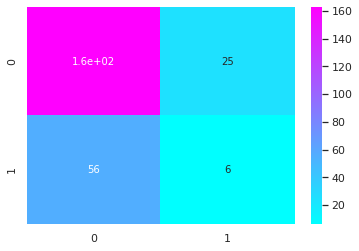

In [ ]:
sns.heatmap(cm_knn, annot = True, cmap = 'cool')
plt.show()

In [ ]:
roc_auc_knn=roc_auc_score(Y_test_KNN, Y_pred_knn)
roc_auc_knn

0.48189773507206585

KNN:AUROC=0.482


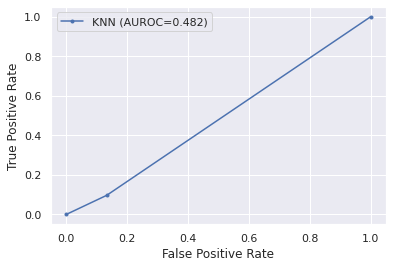

In [ ]:
#ROC Curve:
auc_KNN=roc_auc_score(Y_test_KNN,Y_pred_knn)
print('KNN:AUROC=%.3f' %(auc_KNN))
    
fpr_KNN,tpr_KNN,_=roc_curve(Y_test_KNN,Y_pred_knn)
plt.plot(fpr_KNN,tpr_KNN,marker=".",label="KNN (AUROC=%.3f)"% auc_KNN)

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

**LOGISTIC REGRESSION**

In [ ]:
Y_logistic_regression=data.fraud_reported
Y_logistic_regression=Y_logistic_regression.map({'Y':1,'N':0})
X_logistic_regression=data_re_1.iloc[0:1000,0:302]
Y_logistic_regression

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int64

In [ ]:
X_train_LR,X_test_LR,Y_train_LR,Y_test_LR=train_test_split(X_logistic_regression,Y_logistic_regression,test_size=0.25,random_state=2,stratify=Y)


In [ ]:
X_train_LR,X_test_LR,Y_train_LR,Y_test_LR

(     insured_zip  umbrella_limit  ...  auto_year_2014  auto_year_2015
 579       461264        0.181818  ...               0               0
 222       431121        0.181818  ...               0               0
 624       462250        0.181818  ...               0               0
 234       451560        0.181818  ...               0               1
 938       468232        1.272727  ...               0               0
 ..           ...             ...  ...             ...             ...
 771       614169        0.181818  ...               0               0
 553       616884        0.181818  ...               0               0
 547       603882        0.181818  ...               0               0
 603       466691        0.909091  ...               0               0
 126       435758        0.181818  ...               0               0
 
 [750 rows x 302 columns],
      insured_zip  umbrella_limit  ...  auto_year_2014  auto_year_2015
 77        600648        0.181818  ...          

In [ ]:
logistic_regression=LogisticRegression()
logistic_regression.fit(X_train_LR,Y_train_LR)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Y_pred_LR=logistic_regression.predict(X_test_LR)

In [ ]:
print('Accuracy: ',metrics.accuracy_score(Y_test_LR, Y_pred_LR))

Accuracy:  0.752


In [ ]:
cr_LR=classification_report(Y_test_LR,  Y_pred_LR)
print(cr_LR)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86       188
           1       0.00      0.00      0.00        62

    accuracy                           0.75       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.57      0.75      0.65       250



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
cm_LR = confusion_matrix(Y_test_LR,Y_pred_LR)
cm_LR

array([[188,   0],
       [ 62,   0]])

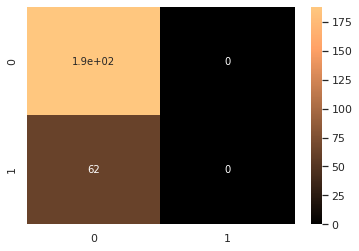

In [ ]:
sns.heatmap(cm_LR, annot = True, cmap = 'copper')

In [ ]:
roc_auc_LR=roc_auc_score(Y_test_LR, Y_pred_LR)
roc_auc_LR

0.5

LOGISTIC REGRESSION:AUROC=0.500


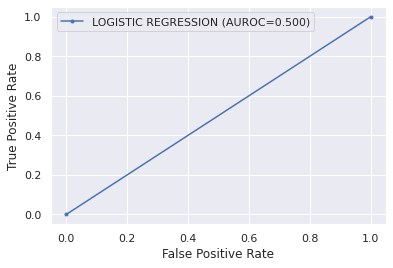

In [ ]:
#ROC Curve:
auc_LR=roc_auc_score(Y_test_LR,Y_pred_LR)
print('LOGISTIC REGRESSION:AUROC=%.3f' %(auc_LR))
    
fpr_LR,tpr_LR,_=roc_curve(Y_test_LR,Y_pred_LR)
plt.plot(fpr_LR,tpr_LR,marker=".",label="LOGISTIC REGRESSION (AUROC=%.3f)"% auc_LR)

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

**RANDOM FOREST CLASSIFICATION**

In [ ]:
X_train_RF=X_train_LR
X_test_RF=X_test_LR
Y_test_RF=Y_test_LR
Y_train_RF=Y_train_LR

In [ ]:
model_RF= RandomForestClassifier(n_estimators = 100, random_state = 0)

model_RF.fit(X_train_RF, Y_train_RF)
Y_pred_rf = model_RF.predict(X_test_RF)

print("Training Accuracy: ", model_RF.score(X_train_RF, Y_train_RF))
print('Testing Accuarcy: ', model_RF.score(X_test_RF, Y_test_RF))


Training Accuracy:  1.0
Testing Accuarcy:  0.772


In [ ]:
cr_RF = classification_report(Y_test_RF,  Y_pred_rf)
print(cr_RF)


              precision    recall  f1-score   support

           0       0.79      0.94      0.86       188
           1       0.59      0.26      0.36        62

    accuracy                           0.77       250
   macro avg       0.69      0.60      0.61       250
weighted avg       0.74      0.77      0.74       250



In [ ]:
cm_RF = confusion_matrix(Y_test_RF, Y_pred_rf)

cm_RF

array([[177,  11],
       [ 46,  16]])

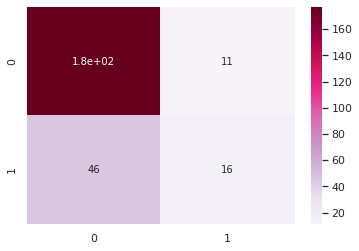

In [ ]:
sns.heatmap(cm_RF, annot = True, cmap = 'PuRd')

In [ ]:
roc_auc_RF=roc_auc_score(Y_test_RF, Y_pred_rf)
roc_auc_RF

0.5997769389155799

RANDOM FOREST:AUROC=0.600


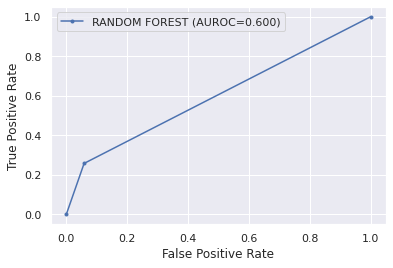

In [ ]:
#ROC Curve:
auc_RF=roc_auc_score(Y_test_RF,Y_pred_rf)
print('RANDOM FOREST:AUROC=%.3f' %(auc_RF))
    
fpr_RF,tpr_RF,_=roc_curve(Y_test_RF,Y_pred_rf)
plt.plot(fpr_RF,tpr_RF,marker=".",label="RANDOM FOREST (AUROC=%.3f)"% auc_RF)

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

**DECISION TREE**

In [ ]:
X_train_dtc=X_train_LR
X_test_dtc=X_test_LR
Y_test_dtc=Y_test_LR
Y_train_dtc=Y_train_LR

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_dtc, Y_train_dtc)
preds_dtc = dtc.predict(X_test_dtc)

score_dtc = dtc.score(X_test_dtc, Y_test_dtc)
print(score_dtc)

cr_dtc = classification_report(Y_test_dtc, preds_dtc)
print(cr_dtc)

0.82
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       188
           1       0.65      0.58      0.62        62

    accuracy                           0.82       250
   macro avg       0.76      0.74      0.75       250
weighted avg       0.81      0.82      0.82       250



In [ ]:
cm_dtc = confusion_matrix(Y_test_dtc, preds_dtc)

print(cm_dtc)

[[169  19]
 [ 26  36]]


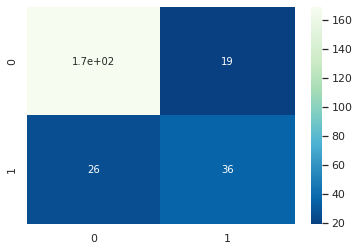

In [ ]:
sns.heatmap(cm_dtc, annot = True, cmap = 'GnBu_r')

In [ ]:
roc_auc_dtc=roc_auc_score(Y_test_dtc, preds_dtc)
roc_auc_dtc

0.7397906657515443

DECISION TREES:AUROC=0.740


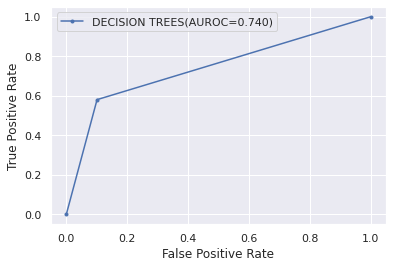

In [ ]:
#ROC Curve:
auc_dtc=roc_auc_score(Y_test_dtc,preds_dtc)
print('DECISION TREES:AUROC=%.3f' %(auc_dtc))
    
fpr_dtc,tpr_dtc,_=roc_curve(Y_test_dtc,preds_dtc)
plt.plot(fpr_dtc,tpr_dtc,marker=".",label="DECISION TREES(AUROC=%.3f)"% auc_dtc)

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

**XG BOOST**

In [ ]:
X_train_XGB=X_train_LR
X_test_XGB=X_test_LR
Y_test_XGB=Y_test_LR
Y_train_XGB=Y_train_LR

In [ ]:
xgb_clf=XGBClassifier()
xgb_clf.fit(X_train_XGB,Y_train_XGB)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
Y_pred_XGB=xgb_clf.predict(X_test_XGB)
print(accuracy_score(Y_test_XGB,Y_pred_XGB))

0.8


In [ ]:
cr_XGB=classification_report(Y_test_XGB,  Y_pred_XGB)
print(cr_XGB )

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       188
           1       0.59      0.61      0.60        62

    accuracy                           0.80       250
   macro avg       0.73      0.74      0.73       250
weighted avg       0.80      0.80      0.80       250



In [ ]:
cm_XGB = confusion_matrix(Y_test_XGB,Y_pred_XGB)
cm_XGB

array([[162,  26],
       [ 24,  38]])

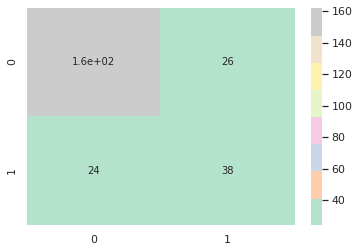

In [ ]:
sns.heatmap(cm_XGB, annot = True, cmap = 'Pastel2')

In [ ]:
roc_auc_XGB=roc_auc_score(Y_test_XGB, Y_pred_XGB)
roc_auc_XGB



0.737302676733013

XGB BOOST:AUROC=0.737


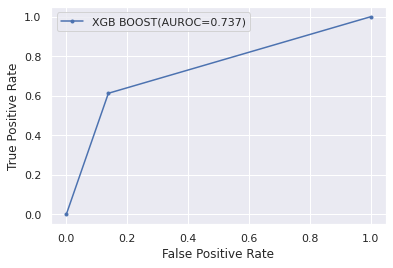

In [ ]:
#ROC Curve:
auc_XGB=roc_auc_score(Y_test_XGB,Y_pred_XGB)
print('XGB BOOST:AUROC=%.3f' %(auc_XGB))
    
fpr_XGB,tpr_XGB,_=roc_curve(Y_test_XGB,Y_pred_XGB)
plt.plot(fpr_XGB,tpr_XGB,marker=".",label="XGB BOOST(AUROC=%.3f)"% auc_XGB)

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

**NEURAL NETWORKS**

In [ ]:
X_train_NN=X_train_LR
X_test_NN=X_test_LR
Y_test_NN=Y_test_LR
Y_train_NN=Y_train_LR

In [ ]:
n_inputs_NN=X.shape[1]

#Neural Network Model

NN=Sequential()
NN.add(Dense(5,activation='relu',kernel_initializer='he_normal',input_shape=(n_inputs_NN,)))
NN.add(Dense(1,activation="sigmoid"))
NN.compile(optimizer='adam',loss='binary_crossentropy')

#Model fitting
test_model_NN=NN.fit(X_train_NN,Y_train_NN,epochs=100,batch_size=20 ,verbose=0,validation_data=(X_test_NN,Y_test_NN))
preds_Y_NN=NN.predict_classes(X_test_NN)

accuracy_NN=accuracy_score(Y_test_NN,preds_Y_NN)*100

loss_NN=NN.evaluate(X_test_NN,Y_test_NN)

print('Accuracy:%.3f'% accuracy_NN)
print('Loss:%.5f'% loss_NN)



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



8/8 [==============================] - 0s 2ms/step - loss: 0.5556
Accuracy:75.200
Loss:0.55559


In [ ]:
cm_NN=confusion_matrix(Y_test_NN,preds_Y_NN,labels=[1,0])
print('Confusion Matrix:\n',cm_NN)


Confusion Matrix:
 [[  0  62]
 [  0 188]]


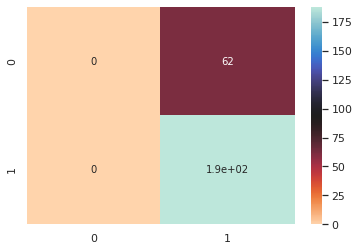

In [ ]:
sns.heatmap(cm_NN, annot = True, cmap = 'icefire_r')

In [ ]:
cr_NN=classification_report(Y_test_NN,preds_Y_NN,labels=[1,0])
print('Classification Report:\n',cr_NN)

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        62
           0       0.75      1.00      0.86       188

    accuracy                           0.75       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.57      0.75      0.65       250



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Neural Network:AUROC=0.500


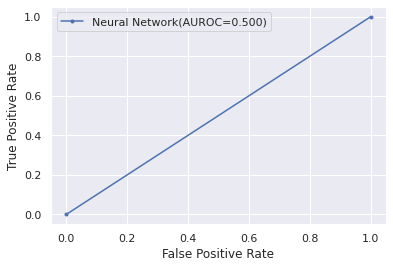

In [ ]:
#ROC Curve:
auc_NN=roc_auc_score(Y_test_NN,preds_Y_NN)
print('Neural Network:AUROC=%.3f' %(auc_NN))
    
fpr,tpr,_=roc_curve(Y_test_NN,preds_Y_NN)
plt.plot(fpr,tpr,marker=".",label="Neural Network(AUROC=%.3f)"% auc_NN)

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

**Support Vector Machine**

In [ ]:
X_train_SVM=X_train_LR
X_test_SVM=X_test_LR
Y_test_SVM=Y_test_LR
Y_train_SVM=Y_train_LR

In [ ]:
svm_clf=SVC(kernel='linear')
svm_clf.fit(X_train_SVM,Y_train_SVM)


In [ ]:
Y_pred_SVM=svm_clf.predict(X_test_SVM)
print(accuracy_score(Y_test_SVM,Y_pred_SVM))

In [ ]:
cr_SVM=classification_report(Y_test_SVM,  Y_pred_SVM)
print(cr_SVM)

In [ ]:
cm_SVM = confusion_matrix(Y_test_SVM,Y_pred_SVM)
cm_SVM

In [ ]:
sns.heatmap(cm_SVM, annot = True, cmap = 'Pastel1')

In [ ]:
roc_auc_SVM=roc_auc_score(Y_test_SVM, Y_pred_SVM)
roc_auc_SVM

In [ ]:
#ROC Curve:
auc_SVM=roc_auc_score(Y_test_SVM,Y_pred_SVM)
print('SVM:AUROC=%.3f' %(auc_SVM))
    
fpr_SVM,tpr_SVM,_=roc_curve(Y_test_SVM,Y_pred_SVM)
plt.plot(fpr_SVM,tpr_SVM,marker=".",label="SVM (AUROC=%.3f)"% auc_SVM)

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()